In [1]:
import tensorflow as tf

In [2]:
from tensorflow.examples.tutorials.mnist import input_data

In [ ]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

In [4]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [5]:
mnist.train.images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [6]:
mnist.train.num_examples

55000

In [7]:
mnist.train.num_examples

55000

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
mnist.train.images.shape

(55000, 784)

In [14]:
single_image = mnist.train.images[1].reshape(28, 28)

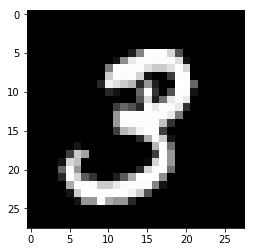

In [16]:
plt.imshow(single_image, cmap='gist_gray')

In [17]:
single_image.min()

0.0

In [18]:
single_image.max()

1.0

In [25]:
# Placeholders
x = tf.placeholder(tf.float32, shape=[None, 784])

In [27]:
# Variables
w = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

In [28]:
# Graph Operations
y = tf.matmul(x, w) + b

In [29]:
# Loss function
y_true = tf.placeholder(tf.float32, [None, 10])
cross_entropy = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(labels=y_true, logits=y))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [30]:
# Optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate=.5)
train = optimizer.minimize(cross_entropy)

In [31]:
# Create session
init = tf.global_variables_initializer()

In [33]:
with tf.Session() as s:
    s.run(init)
    
    for step in range(1000):
        batch_x, batch_y = mnist.train.next_batch(100)
        s.run(train, feed_dict={x: batch_x, y_true: batch_y})
    
    correct_pred = tf.equal(tf.argmax(y, 1), tf.argmax(y_true, 1))
    
    # [True, False, True...] --> [1, 0, 1...]
    acc = tf.reduce_mean(tf.cast(correct_pred, tf.float32))
    
    print(s.run(acc, feed_dict={x: mnist.test.images, y_true: mnist.test.labels}))

0.9182
